<a href="https://colab.research.google.com/github/Hyorim-Kim/numpi/blob/main/tfc17colorimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CIFAR-10 dataset
# The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.
# There are 50000 training images and 10000 test images.
# airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck

import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Flatten, Dense
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.datasets import cifar10

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


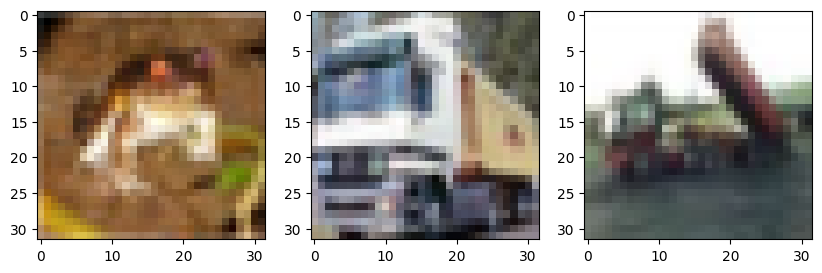

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)  # (50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
# print(x_train[0])  # [[[ 59  62  63]  [ 43  46  45]
# print(y_train[0])  # 6

plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.imshow(x_train[0])
plt.subplot(1, 3, 2)
plt.imshow(x_train[1])
plt.subplot(1, 3, 3)
plt.imshow(x_train[2])
plt.show()

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

NUM_CLASSES = 10
y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = to_categorical(y_test, num_classes=NUM_CLASSES)
print(x_train[0, 12, 13, 1])  # 0.0023068052 : 인덱스 0의 이미지에서 (12, 13) 위치에 해당하는 green channel

0.5882353


In [4]:
# CNN 없이 모델 작성
# Sequential API 사용
# model = Sequential([
#     Dense(units=256, activation='relu', input_shape=(32,32,3)),  # 입력값이 많아 배열 커짐
#     Flatten(),
#     Dense(units=128, activation='relu'),
#     Dense(units=NUM_CLASSES, activation='softmax')
# ])
# print(model.summary())

# Functional API 사용
# input_layer = Input((32,32,3))
# net = Flatten()(input_layer)
# net = Dense(units=256, activation='relu')(net)
# net = Dense(units=128, activation='relu')(net)
# output_layer = Dense(units=NUM_CLASSES, activation='softmax')(net)
# model = Model(input_layer, output_layer)
# print(model.summary())

# CNN 레이어를 Dense 위에 추가
from keras.layers import Conv2D, MaxPool2D, Activation, ReLU, LeakyReLU, BatchNormalization
# BatchNormalization : 활성화 함수의 활성화 값이나 출력값을 정규화함. 학습속도 개선. 가중치 초기값 선택 의존성이 적어짐 => 과적합 방지
input_layer = Input((32,32,3))
net = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(input_layer)
net = BatchNormalization()(net)
net = LeakyReLU()(net)
net = MaxPool2D(pool_size=(2,2))(net)

net = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(net)
net = BatchNormalization()(net)
net = LeakyReLU()(net)
net = MaxPool2D(pool_size=(2,2))(net)

net = Flatten()(net)

net = Dense(units=256)(net)
net = BatchNormalization()(net)
net = LeakyReLU()(net)

net = Dense(units=128)(net)
net = BatchNormalization()(net)
net = LeakyReLU()(net)

output_layer = Dense(units=NUM_CLASSES, activation='softmax')(net)
model = Model(input_layer, output_layer)
print(model.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        36928 

In [5]:
# train
opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=10, shuffle=True, verbose=2)

print('test acc : %.4f'%(model.evaluate(x_test, y_test, verbose=0, batch_size=128)[1]))
print('test loss : %.4f'%(model.evaluate(x_test, y_test, verbose=0, batch_size=128)[0]))

CLASSES = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])


Epoch 1/10
391/391 - 24s - loss: 1.2970 - accuracy: 0.5385 - 24s/epoch - 61ms/step
Epoch 2/10
391/391 - 4s - loss: 0.9391 - accuracy: 0.6673 - 4s/epoch - 11ms/step
Epoch 3/10
391/391 - 6s - loss: 0.8045 - accuracy: 0.7188 - 6s/epoch - 14ms/step
Epoch 4/10
391/391 - 4s - loss: 0.7069 - accuracy: 0.7495 - 4s/epoch - 10ms/step
Epoch 5/10
391/391 - 4s - loss: 0.6251 - accuracy: 0.7776 - 4s/epoch - 9ms/step
Epoch 6/10
391/391 - 5s - loss: 0.5557 - accuracy: 0.8025 - 5s/epoch - 14ms/step
Epoch 7/10
391/391 - 4s - loss: 0.4885 - accuracy: 0.8279 - 4s/epoch - 10ms/step
Epoch 8/10
391/391 - 4s - loss: 0.4335 - accuracy: 0.8455 - 4s/epoch - 10ms/step
Epoch 9/10
391/391 - 5s - loss: 0.3746 - accuracy: 0.8670 - 5s/epoch - 13ms/step
Epoch 10/10
391/391 - 4s - loss: 0.3313 - accuracy: 0.8821 - 4s/epoch - 10ms/step
test acc : 0.6878
test loss : 1.1572


In [7]:
# 예측
pred = model.predict(x_test[:10])
pred_single = CLASSES[np.argmax(pred, axis=-1)]
actual_single = CLASSES[np.argmax(y_test[:10], axis=-1)]
print('예측값 : ', pred_single)
print('실제값 : ', actual_single)
print('분류 실패 수 : ', (pred_single != actual_single).sum())


1/1 [==============================] - 0s 19ms/step
예측값 :  ['cat' 'ship' 'truck' 'frog' 'frog' 'frog' 'automobile' 'frog' 'cat'
 'automobile']
실제값 :  ['cat' 'ship' 'ship' 'airplane' 'frog' 'frog' 'automobile' 'frog' 'cat'
 'automobile']
분류 실패 수 :  2


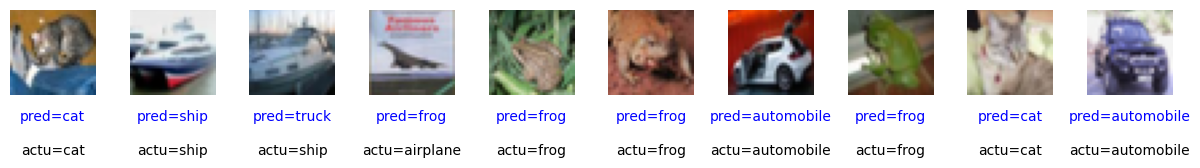

In [13]:
# 시각화
fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(range(len(x_test[:10]))):
  img = x_test[idx]
  ax = fig.add_subplot(1, len(x_test[:10]), i+1)
  ax.axis('off')
  ax.text(0.5, -0.3, 'pred=' + str(pred_single[idx]), fontdict={'fontsize' : 10, 'color':'blue'}, ha='center', transform=ax.transAxes)
  ax.text(0.5, -0.7, 'actu=' + str(actual_single[idx]), fontdict={'fontsize' : 10}, ha='center', transform=ax.transAxes)
  ax.imshow(img)
plt.show()
